In [45]:
import os
import cv2
import csv
import math
import imutils
%matplotlib inline
import numpy as np
from PIL import Image
from time import sleep
from tqdm.notebook import tqdm
from scipy import ndimage as nd
from scipy.ndimage import rotate
from matplotlib import pyplot as plt
from sklearn import metrics

In [9]:
def apply_filter(img, filters):
    #Normalize Image
    img = (img - img.mean()) / img.std()

    # This general function is designed to apply filters to our image
    # First create a numpy array the same size as our input image
    newimage = np.zeros_like(img)
    appliedFilters = []
    # Starting with a blank image, we loop through the images and apply our Gabor Filter
    # On each iteration, we take the highest value (super impose), until we have the max value across all filters
    # The final image is returned
    depth = -1 # remain depth same as original image
     
    for kern in filters:  # Loop through the kernels in our GaborFilter
        image_filter = np.sqrt(nd.convolve(img, np.real(kern), mode='wrap')**2 +
                   nd.convolve(img, np.imag(kern), mode='wrap')**2)
        # Using Numpy.maximum to compare our filter and cumulative image, taking the higher value (max)
        np.maximum(newimage, image_filter, newimage)        
    #newimage = np.array(newimage, dtype='int')
    newimage = np.uint8(newimage)
    return newimage

In [10]:
def create_gaborfilter():
    #https://scikit-image.org/docs/0.11.x/auto_examples/plot_gabor.html
    # This function is designed to produce a set of GaborFilters 
    # an even distribution of theta values equally distributed amongst pi rad / 180 degree
     
    filters = []
    num_filters = 16
    ksize = 9  # The local area to evaluate
    sigma = 5.0
    # Larger Values produce more edges
    lambd = 6.0 #distancia entre picos
    gamma = 0.5 #com d'eliptic
    psi = 0  # Offset value - lower generates cleaner results
    for theta in np.arange(0, np.pi, np.pi / num_filters):  # Theta is the orientation for edge detection
        kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
        kern /= 1.0 * kern.sum()  # Brightness normalization
        filters.append(kern)
    return filters

In [11]:
def showimage(myimage, figsize=[7,7], pltTitle = "", figax =[-1,-1]):
    if (myimage.ndim>2):  #This only applies to RGB or RGBA images (e.g. not to Black and White images)
        myimage = myimage[:,:,::-1] #OpenCV follows BGR order, while matplotlib likely follows RGB order
    if(figax[0] == -1):     
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = figax[0]
        ax = figax[1]
    ax.imshow(myimage, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.title(pltTitle)
    plt.show()
    
#https://www.freedomvc.com/index.php/2021/10/16/gabor-filter-in-edge-detection/

In [34]:
PantsRouteReUP = r'Data\TrimmedPants\Reverse_Up\P_1_1652615425109.jpg'
image_reup = cv2.imread(PantsRouteReUP)

PantsRouteReDo = r'Data\TrimmedPants\Reverse_Down\P_0_1652555127475.jpg'
image_redo = cv2.imread(PantsRouteReDo)

PantsRouteRiDo = r'Data\TrimmedPants\Right_Down\P_2_1652615425192.jpg'
image_rido = cv2.imread(PantsRouteRiDo)

PantsRouteRiUp = r'Data\TrimmedPants\Right_Up\P_3_1652615425298.jpg'
image_riup = cv2.imread(PantsRouteRiUp)

# Bag of words

In [12]:
import cv2
import numpy as np
import os
import pandas as pd
import csv

from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier

In [13]:
img_path = r'Data\TrimmedPants'
train =  pd.read_csv(r'Data\TrimmedPants\pants_dataset.csv')
labels = train.label.sort_values().unique()

In [26]:
dico = []
sift = cv2.SIFT_create()
NoneType = type(None)

for image in train.file:
    img = cv2.imread(image)
    kp, des = sift.detectAndCompute(img, None)
    if(type(des) != NoneType):
        for d in des:
            dico.append(d)

In [27]:
k = np.size(labels) * 10
batch_size = np.size(os.listdir(img_path)) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(dico)

Init 1/3 with method k-means++
Inertia for init 1/3: 7624882.0
Init 2/3 with method k-means++
Inertia for init 2/3: 8093174.0
Init 3/3 with method k-means++
Inertia for init 3/3: 7904807.0
[MiniBatchKMeans] Reassigning 9 cluster centers.
Minibatch step 1/56077: mean batch inertia: 140332.27777777778
[MiniBatchKMeans] Reassigning 9 cluster centers.
Minibatch step 2/56077: mean batch inertia: 142321.1033950617, ewa inertia: 142321.1033950617
[MiniBatchKMeans] Reassigning 9 cluster centers.
Minibatch step 3/56077: mean batch inertia: 136688.95999244144, ewa inertia: 142301.01848545356
[MiniBatchKMeans] Reassigning 9 cluster centers.
Minibatch step 4/56077: mean batch inertia: 118452.68900720164, ewa inertia: 142215.97243679414
[MiniBatchKMeans] Reassigning 9 cluster centers.
Minibatch step 5/56077: mean batch inertia: 109528.57354166667, ewa inertia: 142099.40518961984
[MiniBatchKMeans] Reassigning 9 cluster centers.
Minibatch step 6/56077: mean batch inertia: 111301.03727444906, ewa iner

Minibatch step 95/56077: mean batch inertia: 88237.51754008238, ewa inertia: 129571.6246933567
Minibatch step 96/56077: mean batch inertia: 87740.0979837463, ewa inertia: 129422.44837225259
Minibatch step 97/56077: mean batch inertia: 95359.25118280838, ewa inertia: 129300.97486073006
Minibatch step 98/56077: mean batch inertia: 95457.94176652576, ewa inertia: 129180.28648119648
Minibatch step 99/56077: mean batch inertia: 81746.75104987866, ewa inertia: 129011.13271442804
Minibatch step 100/56077: mean batch inertia: 94130.62718565432, ewa inertia: 128886.74458178456
Minibatch step 101/56077: mean batch inertia: 98162.36422713281, ewa inertia: 128777.17769790468
Minibatch step 102/56077: mean batch inertia: 90755.23114950737, ewa inertia: 128641.58680382422
Minibatch step 103/56077: mean batch inertia: 89970.97013573928, ewa inertia: 128503.68267306137
Minibatch step 104/56077: mean batch inertia: 88380.97033077045, ewa inertia: 128360.60019219732
Minibatch step 105/56077: mean batch 

Minibatch step 195/56077: mean batch inertia: 88400.86065224037, ewa inertia: 117793.23244288022
Minibatch step 196/56077: mean batch inertia: 86939.3998672585, ewa inertia: 117683.20391660758
Minibatch step 197/56077: mean batch inertia: 97554.74389172957, ewa inertia: 117611.42337565705
Minibatch step 198/56077: mean batch inertia: 100495.89912337967, ewa inertia: 117550.38733077522
Minibatch step 199/56077: mean batch inertia: 89810.81043443386, ewa inertia: 117451.46461970358
[MiniBatchKMeans] Reassigning 1 cluster centers.
Minibatch step 200/56077: mean batch inertia: 94314.9828133807, ewa inertia: 117368.95710657554
Minibatch step 201/56077: mean batch inertia: 99438.24582593606, ewa inertia: 117305.01400542617
Minibatch step 202/56077: mean batch inertia: 86315.6527784582, ewa inertia: 117194.50216746968
Minibatch step 203/56077: mean batch inertia: 77248.43775145296, ewa inertia: 117052.04963463395
Minibatch step 204/56077: mean batch inertia: 99459.95703032658, ewa inertia: 11

Minibatch step 300/56077: mean batch inertia: 93727.63959809957, ewa inertia: 108825.58695057814
Minibatch step 301/56077: mean batch inertia: 87252.25250482533, ewa inertia: 108748.65381139566
Minibatch step 302/56077: mean batch inertia: 95416.20139854841, ewa inertia: 108701.10866163217
Minibatch step 303/56077: mean batch inertia: 83287.12807878469, ewa inertia: 108610.4793103709
Minibatch step 304/56077: mean batch inertia: 80858.5743616258, ewa inertia: 108511.5126359623
Minibatch step 305/56077: mean batch inertia: 91815.68950659051, ewa inertia: 108451.97329642219
Minibatch step 306/56077: mean batch inertia: 89578.16383349523, ewa inertia: 108384.66699224533
Minibatch step 307/56077: mean batch inertia: 91791.51325827482, ewa inertia: 108325.49378427872
Minibatch step 308/56077: mean batch inertia: 98250.80097491993, ewa inertia: 108289.56620219482
Minibatch step 309/56077: mean batch inertia: 107643.34488280043, ewa inertia: 108287.26169823264
Minibatch step 310/56077: mean b

Minibatch step 403/56077: mean batch inertia: 91566.31396788388, ewa inertia: 102294.2644066594
Minibatch step 404/56077: mean batch inertia: 72268.16645267443, ewa inertia: 102187.18768290075
Minibatch step 405/56077: mean batch inertia: 97886.12143112041, ewa inertia: 102171.84955659424
Minibatch step 406/56077: mean batch inertia: 87893.46519775054, ewa inertia: 102120.93109825661
Minibatch step 407/56077: mean batch inertia: 90447.8792096051, ewa inertia: 102079.3035729479
Minibatch step 408/56077: mean batch inertia: 77907.78479358538, ewa inertia: 101993.1049918625
Minibatch step 409/56077: mean batch inertia: 79360.17796199392, ewa inertia: 101912.39321642168
Minibatch step 410/56077: mean batch inertia: 78539.77251120332, ewa inertia: 101829.04360320843
Minibatch step 411/56077: mean batch inertia: 82066.67657998236, ewa inertia: 101758.56859450747
Minibatch step 412/56077: mean batch inertia: 100585.88645874521, ewa inertia: 101754.38666712881
Minibatch step 413/56077: mean ba

Minibatch step 507/56077: mean batch inertia: 85070.29408186616, ewa inertia: 97480.57202862485
Minibatch step 508/56077: mean batch inertia: 85708.4410676853, ewa inertia: 97438.59117527232
Minibatch step 509/56077: mean batch inertia: 85158.32923585369, ewa inertia: 97394.7982649386
Minibatch step 510/56077: mean batch inertia: 98608.4428242111, ewa inertia: 97399.12626931045
Minibatch step 511/56077: mean batch inertia: 84724.42596805093, ewa inertia: 97353.92674371904
Minibatch step 512/56077: mean batch inertia: 87723.45712907737, ewa inertia: 97319.58331567277
Minibatch step 513/56077: mean batch inertia: 74539.59760455272, ewa inertia: 97238.3471110566
Minibatch step 514/56077: mean batch inertia: 96940.26078926653, ewa inertia: 97237.28409891353
Minibatch step 515/56077: mean batch inertia: 78455.71128402781, ewa inertia: 97170.30672186193
Minibatch step 516/56077: mean batch inertia: 75744.85468171275, ewa inertia: 97093.90094935619
Minibatch step 517/56077: mean batch inertia

Minibatch step 607/56077: mean batch inertia: 92196.94175999734, ewa inertia: 94483.56829494594
Minibatch step 608/56077: mean batch inertia: 88443.8892423651, ewa inertia: 94462.03006355486
Minibatch step 609/56077: mean batch inertia: 89163.64791113374, ewa inertia: 94443.13538723122
Minibatch step 610/56077: mean batch inertia: 90776.31284893055, ewa inertia: 94430.05905128483
Minibatch step 611/56077: mean batch inertia: 86376.99317856498, ewa inertia: 94401.34083717706
Minibatch step 612/56077: mean batch inertia: 89667.45687100923, ewa inertia: 94384.45923016548
Minibatch step 613/56077: mean batch inertia: 82219.25707495344, ewa inertia: 94341.07663704139
Minibatch step 614/56077: mean batch inertia: 91083.71511210749, ewa inertia: 94329.46048895842
Minibatch step 615/56077: mean batch inertia: 77442.37823314982, ewa inertia: 94269.23909606994
Minibatch step 616/56077: mean batch inertia: 87360.06334059051, ewa inertia: 94244.60013349468
Minibatch step 617/56077: mean batch iner

Minibatch step 711/56077: mean batch inertia: 80588.32860366697, ewa inertia: 92338.04880553024
Minibatch step 712/56077: mean batch inertia: 90085.5635840489, ewa inertia: 92330.01616878202
Minibatch step 713/56077: mean batch inertia: 93906.47008412682, ewa inertia: 92335.63799552323
Minibatch step 714/56077: mean batch inertia: 86513.3020980589, ewa inertia: 92314.87483630492
Minibatch step 715/56077: mean batch inertia: 88619.89452261766, ewa inertia: 92301.69808630069
Minibatch step 716/56077: mean batch inertia: 83833.0124784289, ewa inertia: 92271.49772157722
Minibatch step 717/56077: mean batch inertia: 84173.54336884507, ewa inertia: 92242.6194296804
Minibatch step 718/56077: mean batch inertia: 85972.53290028888, ewa inertia: 92220.2595371536
Minibatch step 719/56077: mean batch inertia: 76351.87478448029, ewa inertia: 92163.67094368195
Minibatch step 720/56077: mean batch inertia: 91858.93918567381, ewa inertia: 92162.58423310361
Minibatch step 721/56077: mean batch inertia:

Minibatch step 815/56077: mean batch inertia: 86280.361982333, ewa inertia: 90855.6533321462
Minibatch step 816/56077: mean batch inertia: 86399.24610177711, ewa inertia: 90839.76124098293
Minibatch step 817/56077: mean batch inertia: 87140.86715066557, ewa inertia: 90826.57053397437
Minibatch step 818/56077: mean batch inertia: 97167.49543587212, ewa inertia: 90849.18304476867
Minibatch step 819/56077: mean batch inertia: 88834.25970821416, ewa inertia: 90841.99758264722
Minibatch step 820/56077: mean batch inertia: 92002.84514947076, ewa inertia: 90846.13730651108
Minibatch step 821/56077: mean batch inertia: 80613.53699105907, ewa inertia: 90809.64660702061
Minibatch step 822/56077: mean batch inertia: 99546.0926461168, ewa inertia: 90840.80183806643
Minibatch step 823/56077: mean batch inertia: 80615.83462447328, ewa inertia: 90804.33835914722
Minibatch step 824/56077: mean batch inertia: 94626.19603637146, ewa inertia: 90817.96756928888
Minibatch step 825/56077: mean batch inertia

Minibatch step 921/56077: mean batch inertia: 79996.2228490176, ewa inertia: 89490.04242966909
Minibatch step 922/56077: mean batch inertia: 90171.25463698823, ewa inertia: 89492.47171540098
Minibatch step 923/56077: mean batch inertia: 90551.80295336791, ewa inertia: 89496.24941966713
Minibatch step 924/56077: mean batch inertia: 90630.1743823675, ewa inertia: 89500.29313424438
Minibatch step 925/56077: mean batch inertia: 94039.43463285327, ewa inertia: 89516.48026588875
Minibatch step 926/56077: mean batch inertia: 81625.07478835707, ewa inertia: 89488.33855244733
Minibatch step 927/56077: mean batch inertia: 102262.3818930992, ewa inertia: 89533.89234742142
Minibatch step 928/56077: mean batch inertia: 87016.58702353724, ewa inertia: 89524.91532992169
Minibatch step 929/56077: mean batch inertia: 92403.71424083105, ewa inertia: 89535.18147759803
Minibatch step 930/56077: mean batch inertia: 95788.29074955682, ewa inertia: 89557.48082715628
Minibatch step 931/56077: mean batch inert

In [30]:
kmeans.verbose = False

histo_list = []

for imagePath in train.file:
    img = cv2.imread(imagePath)
    kp, des = sift.detectAndCompute(img, None)
    histo = np.zeros(k)
    nkp = np.size(kp)

    if(type(des) != NoneType):
        for d in des:
            idx = kmeans.predict([d])
            histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

    histo_list.append(histo)

In [31]:
print(labels)

['Alright_Back' 'Alright_Front' 'Reverse_Back' 'Reverse_Front']


In [32]:
X = np.array(histo_list)
Y = []

# It's a way to convert species name into an integer
for s in train.label:
    Y.append(np.min(np.nonzero(labels == s)))
mlp = MLPClassifier(verbose=True, max_iter=600000)
mlp.fit(X, Y)

Iteration 1, loss = 1.39441272
Iteration 2, loss = 1.39219526
Iteration 3, loss = 1.39005811
Iteration 4, loss = 1.38797198
Iteration 5, loss = 1.38592537
Iteration 6, loss = 1.38393069
Iteration 7, loss = 1.38200264
Iteration 8, loss = 1.38013021
Iteration 9, loss = 1.37832453
Iteration 10, loss = 1.37656835
Iteration 11, loss = 1.37484548
Iteration 12, loss = 1.37316274
Iteration 13, loss = 1.37151598
Iteration 14, loss = 1.36989366
Iteration 15, loss = 1.36828438
Iteration 16, loss = 1.36668545
Iteration 17, loss = 1.36510663
Iteration 18, loss = 1.36354364
Iteration 19, loss = 1.36199736
Iteration 20, loss = 1.36046458
Iteration 21, loss = 1.35893636
Iteration 22, loss = 1.35741806
Iteration 23, loss = 1.35590836
Iteration 24, loss = 1.35441535
Iteration 25, loss = 1.35293299
Iteration 26, loss = 1.35145618
Iteration 27, loss = 1.34998098
Iteration 28, loss = 1.34850581
Iteration 29, loss = 1.34702021
Iteration 30, loss = 1.34552923
Iteration 31, loss = 1.34403335
Iteration 32, los

Iteration 312, loss = 0.55572664
Iteration 313, loss = 0.55357878
Iteration 314, loss = 0.55144073
Iteration 315, loss = 0.54931058
Iteration 316, loss = 0.54717820
Iteration 317, loss = 0.54502534
Iteration 318, loss = 0.54286080
Iteration 319, loss = 0.54067320
Iteration 320, loss = 0.53848625
Iteration 321, loss = 0.53627475
Iteration 322, loss = 0.53405784
Iteration 323, loss = 0.53183906
Iteration 324, loss = 0.52963229
Iteration 325, loss = 0.52743690
Iteration 326, loss = 0.52525834
Iteration 327, loss = 0.52308868
Iteration 328, loss = 0.52092697
Iteration 329, loss = 0.51879076
Iteration 330, loss = 0.51668527
Iteration 331, loss = 0.51457869
Iteration 332, loss = 0.51249661
Iteration 333, loss = 0.51046764
Iteration 334, loss = 0.50848557
Iteration 335, loss = 0.50651836
Iteration 336, loss = 0.50455686
Iteration 337, loss = 0.50261109
Iteration 338, loss = 0.50068217
Iteration 339, loss = 0.49875752
Iteration 340, loss = 0.49684130
Iteration 341, loss = 0.49493135
Iteration 

Iteration 665, loss = 0.15912687
Iteration 666, loss = 0.15862231
Iteration 667, loss = 0.15812050
Iteration 668, loss = 0.15762013
Iteration 669, loss = 0.15712278
Iteration 670, loss = 0.15662704
Iteration 671, loss = 0.15613327
Iteration 672, loss = 0.15564113
Iteration 673, loss = 0.15515166
Iteration 674, loss = 0.15466402
Iteration 675, loss = 0.15417739
Iteration 676, loss = 0.15369161
Iteration 677, loss = 0.15320910
Iteration 678, loss = 0.15272693
Iteration 679, loss = 0.15224781
Iteration 680, loss = 0.15177263
Iteration 681, loss = 0.15129629
Iteration 682, loss = 0.15082051
Iteration 683, loss = 0.15034924
Iteration 684, loss = 0.14987907
Iteration 685, loss = 0.14940996
Iteration 686, loss = 0.14894274
Iteration 687, loss = 0.14847701
Iteration 688, loss = 0.14801437
Iteration 689, loss = 0.14755176
Iteration 690, loss = 0.14709094
Iteration 691, loss = 0.14663388
Iteration 692, loss = 0.14617796
Iteration 693, loss = 0.14572023
Iteration 694, loss = 0.14526676
Iteration 

Iteration 1063, loss = 0.05311641
Iteration 1064, loss = 0.05299195
Iteration 1065, loss = 0.05286899
Iteration 1066, loss = 0.05274509
Iteration 1067, loss = 0.05262166
Iteration 1068, loss = 0.05249957
Iteration 1069, loss = 0.05237685
Iteration 1070, loss = 0.05225530
Iteration 1071, loss = 0.05213427
Iteration 1072, loss = 0.05201251
Iteration 1073, loss = 0.05189179
Iteration 1074, loss = 0.05177186
Iteration 1075, loss = 0.05165138
Iteration 1076, loss = 0.05153269
Iteration 1077, loss = 0.05141380
Iteration 1078, loss = 0.05129480
Iteration 1079, loss = 0.05117576
Iteration 1080, loss = 0.05105903
Iteration 1081, loss = 0.05094151
Iteration 1082, loss = 0.05082332
Iteration 1083, loss = 0.05070578
Iteration 1084, loss = 0.05058941
Iteration 1085, loss = 0.05047359
Iteration 1086, loss = 0.05035698
Iteration 1087, loss = 0.05024272
Iteration 1088, loss = 0.05012796
Iteration 1089, loss = 0.05001274
Iteration 1090, loss = 0.04989778
Iteration 1091, loss = 0.04978381
Iteration 1092

MLPClassifier(max_iter=600000, verbose=True)

In [62]:
img = cv2.imread(r'Data\TrimmedPants2\Reverse_Up\P_1_IMG_20220329_190142.jpg')
kp, des = sift.detectAndCompute(img, None)

x = np.zeros(k)
nkp = np.size(kp)

for d in des:
    idx = kmeans.predict([d])
    x[idx] += 1/nkp

res = mlp.predict([x])

In [63]:
res

array([0], dtype=int64)

In [64]:
labels

array(['Alright_Back', 'Alright_Front', 'Reverse_Back', 'Reverse_Front'],
      dtype=object)

# Visualizing

C:\Users\pauso\anaconda3\envs\TFG_Project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


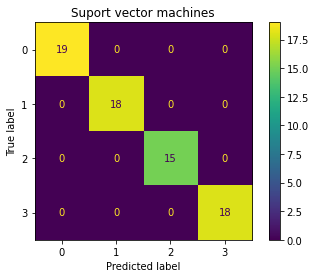

In [49]:
metrics.plot_confusion_matrix(mlp, X, Y)
plt.title("Suport vector machines")
plt.show()